# AI2S Hackaton 

## Team Assacro

**Regression Problem**

# Import Libraries

In [317]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime


# Data Integration and Essential Preprocessing
1. Import dataset
2. Parse Month column to datetime datatype

In [318]:
df = pd.read_csv("../data/01_input_history.csv")

In [319]:
df

,Country,Product,Month,Quantity
0,Japan,MorningMint,Jan2004,0
1,Japan,MorningMint,Feb2004,0
2,Japan,MorningMint,Mar2004,0
3,Japan,MorningMint,Apr2004,0
4,Japan,MorningMint,May2004,0
...,...,...,...,...
239995,Russia,HydratingHoney Pet Wipes,Aug2023,0
239996,Russia,HydratingHoney Pet Wipes,Sep2023,0
239997,Russia,HydratingHoney Pet Wipes,Oct2023,0
239998,Russia,HydratingHoney Pet Wipes,Nov2023,0


In [320]:
df['date'] = pd.to_datetime(df['Month'], format='%b%Y')

In [321]:
df

,Country,Product,Month,Quantity,date
0,Japan,MorningMint,Jan2004,0,2004-01-01
1,Japan,MorningMint,Feb2004,0,2004-02-01
2,Japan,MorningMint,Mar2004,0,2004-03-01
3,Japan,MorningMint,Apr2004,0,2004-04-01
4,Japan,MorningMint,May2004,0,2004-05-01
...,...,...,...,...,...
239995,Russia,HydratingHoney Pet Wipes,Aug2023,0,2023-08-01
239996,Russia,HydratingHoney Pet Wipes,Sep2023,0,2023-09-01
239997,Russia,HydratingHoney Pet Wipes,Oct2023,0,2023-10-01
239998,Russia,HydratingHoney Pet Wipes,Nov2023,0,2023-11-01


# EDA
Some plots to give us ideas...

<Axes: xlabel='date', ylabel='Quantity'>

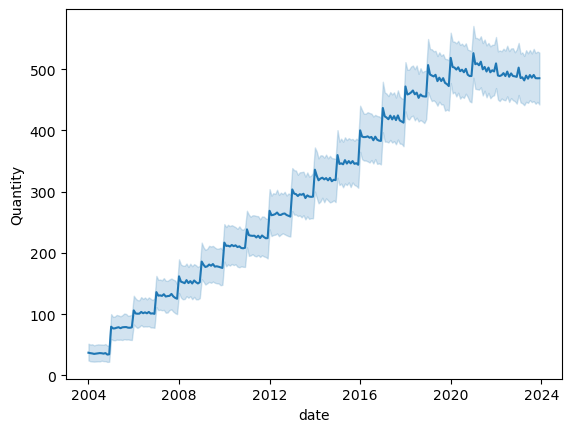

In [322]:
sns.lineplot(data=df, x='date', y='Quantity')

Maybe isotonic regression is good?

In [323]:
#sns.lineplot(data=df, x='date', y='Quantity', hue='Country')

![img](../images/output.png)

Maybe each country is *"as important"* in contributions?

# Data Preprocessing
1. Define manual encoders
2. Split date into month and ytear
3. Split in X, y

In [324]:
df.groupby('Country').describe()['Quantity'].sort_values('mean')

,count,mean,min,25%,50%,75%,max,std
Country,,,,,,,,
South Africa,24000.0,63.672875,0.0,0.0,0.0,0.00,2115.0,271.256894
India,24000.0,145.322167,0.0,0.0,0.0,0.00,2243.0,430.287969
Egypt,24000.0,180.979000,0.0,0.0,0.0,0.00,2150.0,437.398637
Australia,24000.0,221.142792,0.0,0.0,0.0,0.00,2135.0,500.450572
Brazil,24000.0,300.795875,0.0,0.0,0.0,0.00,2301.0,578.444887
Japan,24000.0,336.545083,0.0,0.0,0.0,570.00,2317.0,584.903052
Russia,24000.0,386.807458,0.0,0.0,0.0,776.25,2242.0,646.757206
France,24000.0,421.289875,0.0,0.0,0.0,822.00,2205.0,645.960522
Italy,24000.0,459.524083,0.0,0.0,0.0,915.00,2252.0,642.018752


In [325]:
df.groupby('Product').describe()['Quantity'].sort_values('mean').index.tolist()

['PurePore Sanitary Belt',
 'DailyDazzle Toothpaste',
 'SoftStep Shaving Cream for Women',
 'SmilesSoPure Waterpik',
 'GentleGlow Pet Grooming Kit',
 'SmoothOperator Shaving Gel',
 'MorningMint',
 'SoothingSoft Fabric Softener',
 'RadiantRinse Color Protector',
 'HydraHydrate Hand Cream',
 'RadiantRose Face Mask',
 'SkinSational Moisturizer',
 'RadiantRose Hair Serum',
 'SparklingSmile Water Flosser',
 'CalmingClean Bath Time Wash',
 'FreshFusion Mouth Rinse',
 'CleanSlate Disinfectant Spray',
 'SoothingSerenity Baby Rub',
 'HydratingHoney Pet Wipes',
 'SoothingPaws Cat Lotion',
 'CleanSlate Mouthwash',
 'CleanSkin Acne Treatment',
 'SoothingSerenity Baby Oil',
 'SmellSational Baby Room Spray',
 'OralEase Plus Toothbrush',
 'EasyWash Laundry Detergent',
 'SmileSavvy Tooth Whitening Kit',
 'BrightBreeze Baby Sunscreen Stick',
 'DelicateDew Sensitive Wash',
 'LuminousLip Care',
 'EasyWash Pet Laundry Detergent',
 'BrightBreeze Period Pain Relief',
 'BrightBreeze Pet Odor Eliminator',
 'S

In [326]:
hash_countries = {'South Africa': 1,
 'India': 2,
 'Egypt': 3,
 'Australia': 4,
 'Brazil': 5,
 'Japan': 6,
 'Russia': 7,
 'France': 8,
 'Italy': 9,
 'United Kingdom': 10}

In [327]:
hash_products = {}

for i, product in enumerate(df.groupby('Product').describe()['Quantity'].sort_values('mean').index.tolist()):
    hash_products[product] = i+1

In [328]:
hash_products

{'PurePore Sanitary Belt': 1,
 'DailyDazzle Toothpaste': 2,
 'SoftStep Shaving Cream for Women': 3,
 'SmilesSoPure Waterpik': 4,
 'GentleGlow Pet Grooming Kit': 5,
 'SmoothOperator Shaving Gel': 6,
 'MorningMint': 7,
 'SoothingSoft Fabric Softener': 8,
 'RadiantRinse Color Protector': 9,
 'HydraHydrate Hand Cream': 10,
 'RadiantRose Face Mask': 11,
 'SkinSational Moisturizer': 12,
 'RadiantRose Hair Serum': 13,
 'SparklingSmile Water Flosser': 14,
 'CalmingClean Bath Time Wash': 15,
 'FreshFusion Mouth Rinse': 16,
 'CleanSlate Disinfectant Spray': 17,
 'SoothingSerenity Baby Rub': 18,
 'HydratingHoney Pet Wipes': 19,
 'SoothingPaws Cat Lotion': 20,
 'CleanSlate Mouthwash': 21,
 'CleanSkin Acne Treatment': 22,
 'SoothingSerenity Baby Oil': 23,
 'SmellSational Baby Room Spray': 24,
 'OralEase Plus Toothbrush': 25,
 'EasyWash Laundry Detergent': 26,
 'SmileSavvy Tooth Whitening Kit': 27,
 'BrightBreeze Baby Sunscreen Stick': 28,
 'DelicateDew Sensitive Wash': 29,
 'LuminousLip Care': 30,


In [329]:
df = df.drop(columns=["Month"])

In [330]:
df = df[df['Quantity']>0]

In [331]:
X = df.drop(columns=["Quantity"])

In [332]:
X['Year'] = X['date'].dt.year
X['Month'] = X['date'].dt.month

In [333]:
X['Year_lagged'] = X['Year']-1

In [334]:
X['Country'] = X['Country'].map(hash_countries)

In [335]:
X['Product'] = X['Product'].map(hash_products)

In [336]:
X = X.drop(columns='date')

In [337]:
y = df['Quantity']

# Baseline Model

In [338]:
from sklearn.tree import DecisionTreeRegressor

In [339]:
DT = DecisionTreeRegressor().fit(X, y)

In [340]:
y_hat = DT.predict(X)

In [341]:
from sklearn.metrics import r2_score

In [342]:
r2_score(y, y_hat)

1.0

hmm.. overfitting

# Model Evaluation & Selection

In [427]:
df = pd.read_csv("../data/01_input_history.csv")

In [428]:
from sklearn.preprocessing import StandardScaler

In [429]:
def preprocess_dataset(df_old):
    """
    INPUT:
        - original dataset
        
    RETURNS:
        - processed dataset
    """
    df = df_old.copy()


    df['date'] = pd.to_datetime(df['Month'], format='%b%Y')
    df['Year'] = df['date'].dt.year
    df['Month'] = df['date'].dt.month


    df['Year'] = df['Year']
    df['Month'] =  df['Month']

    df['Product'] = df['Product'].map(hash_products) 
    df['Country'] = df['Country'].map(hash_countries)

    df = df.drop(columns=['date'])
    
    return df


In [430]:
df_preprocessed = preprocess_dataset(df)

In [426]:
df_preprocessed

,Country,Product,Month,Quantity,Year,Year_lagged
0,6,7,12,0,21,2003
1,6,7,11,0,21,2003
2,6,7,10,0,21,2003
3,6,7,9,0,21,2003
4,6,7,8,0,21,2003
...,...,...,...,...,...,...
239995,7,19,5,0,2,2022
239996,7,19,4,0,2,2022
239997,7,19,3,0,2,2022
239998,7,19,2,0,2,2022


# use arima

In [ ]:
dateparse = lambda x: datetime.datetime.strptime(x, '%b%Y')

In [ ]:
df_orig = pd.read_csv("../data/01_input_history.csv", parse_dates=True, date_parser=dateparse)

AttributeError: 'RangeIndex' object has no attribute 'to_period'

In [431]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(df_preprocessed)

ValueError: SARIMAX models require univariate `endog`. Got shape (240000, 5).

###

In [348]:
X = df_preprocessed.drop(columns='Quantity')
y = df_preprocessed['Quantity']

In [349]:
from sklearn.model_selection import TimeSeriesSplit

In [350]:
splitter = TimeSeriesSplit(20)

In [351]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, StackingRegressor
from sklearn.isotonic import IsotonicRegression
from xgboost import XGBRegressor
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_squared_error

In [352]:
from sklearn.metrics import mean_squared_error

In [353]:
for i, j in zip(y, y):
    print(i, j)
    break

0 0


In [354]:
y

0         0
1         0
2         0
3         0
4         0
         ..
239995    0
239996    0
239997    0
239998    0
239999    0
Name: Quantity, Length: 240000, dtype: int64

In [355]:
def custom_loss(y_true, y_pred):
    """
    Implements custom loss described on first page
    """
    n = y_true.shape[0]

    L = 0
    for y_i, y_i_hat in zip(y_true, y_pred):
        p = (y_i - y_i_hat)**2
        if y_i == 0:
            L += (p/(y_i+1))
        else:
            L += (p/(y_i))
    L = L/n 

    return L

In [356]:

def evaluate_model(model):
    r2_scores = []
    for train_idx, test_idx in splitter.split(X, y):
        scaler = StandardScaler()
        
        X_train = X.iloc[train_idx]
        X_test = X.iloc[test_idx]

        scaler.fit(X_train)

        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)


        y_train = y.iloc[train_idx]
        y_test = y.iloc[test_idx]
        DT = model.fit(X_train, y_train)

        y_hat_test = DT.predict(X_test)
        y_hat_train = DT.predict(X_train)
        r2_scores.append(score_i_test := custom_loss(y_test, y_hat_test))
        score_i_train = custom_loss(y_train, y_hat_train)
        print(f"TEST: {score_i_test} || TRAIN: {score_i_train}")
    print("=====")
    print(np.mean(r2_scores))


In [357]:
evaluate_model(DummyRegressor()) # get baseline

TEST: 64085.63825004314 || TRAIN: 68414.29743268806
TEST: 91917.1954742064 || TRAIN: 80192.79913961778
TEST: 70648.76651991613 || TRAIN: 66162.09653857318
TEST: 67436.7717607034 || TRAIN: 62058.76689328321
TEST: 57562.943581493586 || TRAIN: 57561.69963849878
TEST: 57794.21210083646 || TRAIN: 58951.41497304081
TEST: 64742.32911220873 || TRAIN: 57230.78034935354
TEST: 42023.85773723238 || TRAIN: 51778.292739373
TEST: 46816.541967913756 || TRAIN: 61070.78656518464
TEST: 72775.04568419821 || TRAIN: 67536.24506004309
TEST: 80139.04228895743 || TRAIN: 62856.48476183954
TEST: 59097.13269857286 || TRAIN: 55625.16623225645
TEST: 44255.3510854196 || TRAIN: 54359.96796030221
TEST: 59525.951404810454 || TRAIN: 60260.776283876665
TEST: 71107.65371240005 || TRAIN: 59733.057062610045
TEST: 56908.1131832673 || TRAIN: 55597.27611254416
TEST: 43081.97308158332 || TRAIN: 56758.10343669695
TEST: 51891.669534959045 || TRAIN: 61852.363853869036
TEST: 59850.00872608143 || TRAIN: 65481.71564677408
TEST: 63973

In [415]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
ARIMA(

ValueError: length of x0 != length of bounds

In [417]:
evaluate_model(KNeighborsRegressor(10))
 

TEST: 81843.22312538937 || TRAIN: 54716.86996557451
TEST: 128921.4345487219 || TRAIN: 78901.87501835871
TEST: 129919.80353822403 || TRAIN: 65174.89751745325
TEST: 89260.83752509938 || TRAIN: 70253.17895163392
TEST: 75533.70931893695 || TRAIN: 64728.38697215806
TEST: 75862.20654240786 || TRAIN: 68110.20891594348
TEST: 127670.76999128313 || TRAIN: 64345.79605626559
TEST: 41461.81174725106 || TRAIN: 61459.12024033779
TEST: 74832.75220786416 || TRAIN: 63780.88978804917
TEST: 88339.17825278829 || TRAIN: 72464.52049054837
TEST: 150522.73186633262 || TRAIN: 71997.45903305396
TEST: 93227.87925163758 || TRAIN: 65752.77957824885
TEST: 54187.715243458406 || TRAIN: 62668.96987668375
TEST: 74421.33903681974 || TRAIN: 68402.5282501083
TEST: 138341.63439249274 || TRAIN: 67422.3155930515
TEST: 76474.47392026846 || TRAIN: 65211.115598431104
TEST: 68872.72216222677 || TRAIN: 64264.121463945994
TEST: 69560.2160236482 || TRAIN: 68869.00550763865
TEST: 54112.606175783156 || TRAIN: 72282.076278266
TEST: 889

In [ ]:
evaluate_model(DummyRegressor(strategy='mean'))
 

TEST: 64085.63825004314 || TRAIN: 68414.29743268806
TEST: 91917.1954742064 || TRAIN: 80192.79913961778
TEST: 70648.76651991613 || TRAIN: 66162.09653857318
TEST: 67436.7717607034 || TRAIN: 62058.76689328321
TEST: 57562.943581493586 || TRAIN: 57561.69963849878
TEST: 57794.21210083646 || TRAIN: 58951.41497304081
TEST: 64742.32911220873 || TRAIN: 57230.78034935354
TEST: 42023.85773723238 || TRAIN: 51778.292739373
TEST: 46816.541967913756 || TRAIN: 61070.78656518464
TEST: 72775.04568419821 || TRAIN: 67536.24506004309
TEST: 80139.04228895743 || TRAIN: 62856.48476183954
TEST: 59097.13269857286 || TRAIN: 55625.16623225645
TEST: 44255.3510854196 || TRAIN: 54359.96796030221
TEST: 59525.951404810454 || TRAIN: 60260.776283876665
TEST: 71107.65371240005 || TRAIN: 59733.057062610045
TEST: 56908.1131832673 || TRAIN: 55597.27611254416
TEST: 43081.97308158332 || TRAIN: 56758.10343669695
TEST: 51891.669534959045 || TRAIN: 61852.363853869036
TEST: 59850.00872608143 || TRAIN: 65481.71564677408
TEST: 63973

In [359]:
evaluate_model(DummyRegressor(strategy='median'))


TEST: 367.016013300665 || TRAIN: 305.5395979020979
TEST: 221.88283164158207 || TRAIN: 336.26167570404056
TEST: 250.7425621281064 || TRAIN: 298.14873454630276
TEST: 221.43358417920896 || TRAIN: 286.30030181086516
TEST: 293.08172908645435 || TRAIN: 273.3296822508399
TEST: 250.7373993699685 || TRAIN: 276.6211140274132
TEST: 149.03368918445923 || TRAIN: 272.92399510048995
TEST: 484.4888869443472 || TRAIN: 257.43973927118424
TEST: 464.52073853692684 || TRAIN: 282.6644793124903
TEST: 172.5106755337767 || TRAIN: 300.8481958492283
TEST: 45.88414420721036 || TRAIN: 289.1822621699014
TEST: 220.47646132306616 || TRAIN: 268.90919298859626
TEST: 488.5938046902345 || TRAIN: 265.18389914925694
TEST: 264.2815015750788 || TRAIN: 281.1405527361816
TEST: 95.99072453622681 || TRAIN: 280.0166946661067
TEST: 312.8977948897445 || TRAIN: 268.5158263152138
TEST: 520.839604480224 || TRAIN: 271.12636910154
TEST: 466.0218760938047 || TRAIN: 284.9985173734663
TEST: 398.7560378018901 || TRAIN: 294.5255360498103
TES

In [360]:
evaluate_model(Ridge(1, fit_intercept=False, solver='saga'))

TEST: 35233.94061733904 || TRAIN: 33744.21107587856
TEST: 45859.08637579788 || TRAIN: 39667.94916060582
TEST: 39063.688369002746 || TRAIN: 36753.46959848277
TEST: 31129.993466604337 || TRAIN: 32399.471439745234
TEST: 34578.99658063809 || TRAIN: 35141.08897074972
TEST: 34707.247685454044 || TRAIN: 33884.56835412535
TEST: 35479.64377533593 || TRAIN: 31617.55537154567
TEST: 22742.807118431912 || TRAIN: 29305.315380271288
TEST: 26464.81050528735 || TRAIN: 34713.5069608939
TEST: 40561.17979458962 || TRAIN: 35544.7556989506
TEST: 34759.96283221992 || TRAIN: 32306.214797030378
TEST: 29586.720646814945 || TRAIN: 31386.566158992013
TEST: 18353.862565325315 || TRAIN: 31892.575771655313
TEST: 39953.88521069527 || TRAIN: 35854.8632999963
TEST: 31508.40545139943 || TRAIN: 35560.62371023593
TEST: 29203.115767343763 || TRAIN: 33985.467918580485
TEST: 18598.640674781524 || TRAIN: 35325.16181088513
TEST: 42144.93659283982 || TRAIN: 38162.15958212037
TEST: 23174.869008459053 || TRAIN: 40024.21087688748


In [361]:
df = X.copy()
df['target'] = y

df.corr()

,Country,Product,Month,Year,Year_lagged,target
Country,1.000000e+00,-3.500114e-15,-6.137574e-15,2.801374e-15,-7.964122e-13,0.244263
Product,-3.500114e-15,1.000000e+00,-5.074599e-17,1.329364e-16,-2.561751e-15,0.224672
Month,-6.137574e-15,-5.074599e-17,1.000000e+00,4.222514e-18,9.122505e-17,0.005007
Year,2.801374e-15,1.329364e-16,4.222514e-18,1.000000e+00,-1.000000e+00,-0.264742
Year_lagged,-7.964122e-13,-2.561751e-15,9.122505e-17,-1.000000e+00,1.000000e+00,0.264742
target,2.442627e-01,2.246724e-01,5.007090e-03,-2.647421e-01,2.647421e-01,1.000000


In [362]:
X

,Country,Product,Month,Year,Year_lagged
0,6,7,12,21,2003
1,6,7,11,21,2003
2,6,7,10,21,2003
3,6,7,9,21,2003
4,6,7,8,21,2003
...,...,...,...,...,...
239995,7,19,5,2,2022
239996,7,19,4,2,2022
239997,7,19,3,2,2022
239998,7,19,2,2,2022


# Deployment

In [363]:
df_test = pd.read_csv("../data/01_output_prediction_example.csv")

In [364]:
df_test.drop(columns=['Quantity'], inplace=True)

In [365]:
df_test_preprocessed = preprocess_dataset(df_test)

In [366]:
df_test_preprocessed

,Country,Product,Month,Year,Year_lagged
0,6,7,12,1,2023
1,6,7,11,1,2023
2,6,7,10,1,2023
3,6,7,9,1,2023
4,6,7,8,1,2023
...,...,...,...,...,...
11995,7,19,5,1,2023
11996,7,19,4,1,2023
11997,7,19,3,1,2023
11998,7,19,2,1,2023


In [367]:
selected = ['Country', 'Product', 'Year']

In [368]:
X_original = X.copy()

In [369]:
X = X_original

In [370]:
X

,Country,Product,Month,Year,Year_lagged
0,6,7,12,21,2003
1,6,7,11,21,2003
2,6,7,10,21,2003
3,6,7,9,21,2003
4,6,7,8,21,2003
...,...,...,...,...,...
239995,7,19,5,2,2022
239996,7,19,4,2,2022
239997,7,19,3,2,2022
239998,7,19,2,2,2022


In [371]:
df_preprocessed

,Country,Product,Month,Quantity,Year,Year_lagged
0,6,7,12,0,21,2003
1,6,7,11,0,21,2003
2,6,7,10,0,21,2003
3,6,7,9,0,21,2003
4,6,7,8,0,21,2003
...,...,...,...,...,...,...
239995,7,19,5,0,2,2022
239996,7,19,4,0,2,2022
239997,7,19,3,0,2,2022
239998,7,19,2,0,2,2022


In [372]:
X

,Country,Product,Month,Year,Year_lagged
0,6,7,12,21,2003
1,6,7,11,21,2003
2,6,7,10,21,2003
3,6,7,9,21,2003
4,6,7,8,21,2003
...,...,...,...,...,...
239995,7,19,5,2,2022
239996,7,19,4,2,2022
239997,7,19,3,2,2022
239998,7,19,2,2,2022


In [373]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [374]:
X_scaled = scaler.transform(X)
df_test_preprocessed_scaled = scaler.transform(df_test_preprocessed)

In [392]:
DT = DecisionTreeRegressor().fit(X_scaled, y)

In [393]:
df_test['Quantity'] = DT.predict(df_test_preprocessed_scaled).astype('int')

In [394]:
# df_test['Quantity'] = DummyRegressor().fit(X, y).predict(df_test_preprocessed).astype('int')

In [395]:
df_test.to_csv('../data/01_monster2.csv', index=False)

In [396]:
# try PCA

In [397]:
df_test_preprocessed['value'] = df_test['Quantity']

In [398]:
df_test_preprocessed

,Country,Product,Month,Year,Year_lagged,value,Day,date
0,6,7,12,2024,2023,0,1,2024-12-01
1,6,7,11,2024,2023,0,1,2024-11-01
2,6,7,10,2024,2023,0,1,2024-10-01
3,6,7,9,2024,2023,0,1,2024-09-01
4,6,7,8,2024,2023,0,1,2024-08-01
...,...,...,...,...,...,...,...,...
11995,7,19,5,2024,2023,0,1,2024-05-01
11996,7,19,4,2024,2023,0,1,2024-04-01
11997,7,19,3,2024,2023,0,1,2024-03-01
11998,7,19,2,2024,2023,0,1,2024-02-01


In [399]:
df_test_preprocessed['Day'] = 1
df_test_preprocessed['Year'] = 2024
df_test_preprocessed['date'] = pd.to_datetime(df_test_preprocessed[['Day', 'Month', 'Year']])

In [400]:
my_df = X.copy()

In [401]:
my_df['Month'] = 13 - my_df['Month']

In [402]:
my_df['Year'] = 2025 - my_df['Year']

In [403]:
my_df['Day'] = 1

In [404]:
my_df['date'] = pd.to_datetime(my_df[['Day', 'Month', 'Year']])

In [405]:
my_df['value'] = y

In [406]:
my_df

,Country,Product,Month,Year,Year_lagged,Day,date,value
0,6,7,1,2004,2003,1,2004-01-01,0
1,6,7,2,2004,2003,1,2004-02-01,0
2,6,7,3,2004,2003,1,2004-03-01,0
3,6,7,4,2004,2003,1,2004-04-01,0
4,6,7,5,2004,2003,1,2004-05-01,0
...,...,...,...,...,...,...,...,...
239995,7,19,8,2023,2022,1,2023-08-01,0
239996,7,19,9,2023,2022,1,2023-09-01,0
239997,7,19,10,2023,2022,1,2023-10-01,0
239998,7,19,11,2023,2022,1,2023-11-01,0


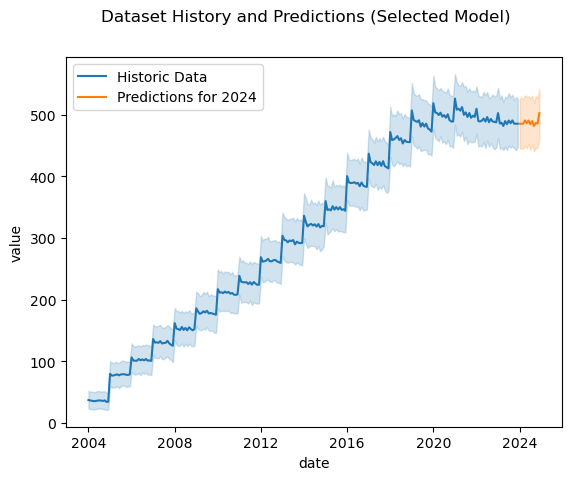

In [407]:
fig, ax = plt.subplots()

sns.lineplot(my_df, x='date', y='value', ax=ax, label="Historic Data")
sns.lineplot(df_test_preprocessed, x='date', y='value', ax=ax, label="Predictions for 2024")

fig.suptitle("Dataset History and Predictions (Selected Model)")

plt.show()

In [408]:
DT.feature_importances_

array([0.28764491, 0.56018984, 0.00716762, 0.04651108, 0.09848655])

In [409]:
X

,Country,Product,Month,Year,Year_lagged
0,6,7,12,21,2003
1,6,7,11,21,2003
2,6,7,10,21,2003
3,6,7,9,21,2003
4,6,7,8,21,2003
...,...,...,...,...,...
239995,7,19,5,2,2022
239996,7,19,4,2,2022
239997,7,19,3,2,2022
239998,7,19,2,2,2022
